In [405]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [406]:
c_darkblue = "#374c8c"
c_darkgreen = "#417d4e"

In [407]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Number of distinct k-mers

In [408]:
fly = pd.read_csv("fly.kmer.stats", sep = "\t")
fly.head()

,kmer-size,distinct-kmer-count
0,11,2097094
1,13,27828198
2,15,89301143
3,17,113312942
4,19,118293258


In [409]:
max_kmer_count = []
for k in fly["kmer-size"]:
    max_kmer_count.append(4**k)

In [410]:
max_kmer_count

[4194304,
 67108864,
 1073741824,
 17179869184,
 274877906944,
 4398046511104,
 70368744177664]

In [411]:
simulated = pd.read_csv("simulated.kmer.stats", sep = "\t")
simulated.head()

,kmer-size,distinct-kmer-count
0,11,2097152
1,13,33131198
2,15,128440142
3,17,145554598
4,19,146722112


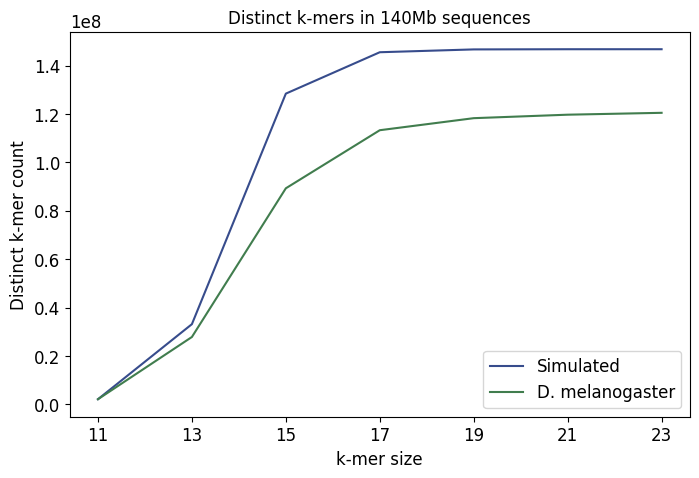

In [413]:
plt.figure(figsize=(8, 5))
plt.plot(simulated["kmer-size"], simulated["distinct-kmer-count"], label = "Simulated", color = c_darkblue)
plt.plot(fly["kmer-size"], fly["distinct-kmer-count"], label = "D. melanogaster", color = c_darkgreen)
plt.xticks(fly["kmer-size"])
plt.xlabel("k-mer size")
plt.ylabel("Distinct k-mer count")
plt.title("Distinct k-mers in 140Mb sequences")
plt.legend(loc = "lower right")
fig.tight_layout()
plt.savefig('distinct_kmer_count.png', dpi = 250)
plt.show()

# 11-mer occurrence counts 

In [391]:
def read_occ_table(path):
    df = pd.read_csv(path, sep = "\t", header = None)
    df.columns = ["count", "occurrences"]
    df["frequency"] = df["count"] / np.sum(df["count"])
    if (abs(1 - np.sum(df["frequency"])) > 0.05):
        print("Incorrect frequency")
    return df

In [392]:
fly = read_occ_table("fly.11mer.tsv")
fly.head()

,count,occurrences,frequency
0,329,1,0.000157
1,895,2,0.000427
2,1929,3,0.000920
3,3453,4,0.001647
4,5152,5,0.002457


In [393]:
sim = read_occ_table("simulated.11mer.tsv")
sim.head()

,count,occurrences,frequency
0,1,30,4.768372e-07
1,1,33,4.768372e-07
2,2,34,9.536743e-07
3,4,35,1.907349e-06
4,7,36,3.337860e-06


K-mer abundance is the number of times a distinct k-mer appears in a dataset.

In [394]:
def kmer_stats(df):
    print("No of distinct k-mers\t" + str(np.sum(df["count"])))
    print("Mode of k-mer abundance\t" + str(df["occurrences"][np.argmax(df["count"])]))
    
    print("\tThere are " + str(np.max(df["count"])) + " k-mers that appear " + str(df["occurrences"][np.argmax(df["count"])]) + " times")
    print("\t" + str(np.round(np.max(df["frequency"]) * 100, 2)) + "% of all distinct k-mers appear " + str(df["occurrences"][np.argmax(df["count"])]) + " times")
    print()
    print("K-mer counter stats")
    print("\tmin\t" + str(np.min(df["occurrences"])))
    weighted_sum = np.sum(df["occurrences"] * df["count"])
    mean_kmer_count = np.round(weighted_sum / np.sum(df["count"]))
    print("\tmean\t" + str(mean_kmer_count))
    print("\tmax\t" + str(np.max(df["occurrences"])))

In [395]:
kmer_stats(fly)

No of distinct k-mers	2097094
Mode of k-mer abundance	24
	There are 32555 k-mers that appear 24 times
	1.55% of all distinct k-mers appear 24 times

K-mer counter stats
	min	1
	mean	68.0
	max	64000


In [396]:
kmer_stats(sim)

No of distinct k-mers	2097152
Mode of k-mer abundance	69
	There are 100056 k-mers that appear 69 times
	4.77% of all distinct k-mers appear 69 times

K-mer counter stats
	min	30
	mean	70.0
	max	117


In [402]:
def plot_abundance(ax, df, abundance_thresh, name, colorname):
    df_low_abundance = df.loc[df['occurrences'] <= abundance_thresh]
    ax.bar(df_low_abundance["occurrences"], df_low_abundance["frequency"], width = 1.0, color = colorname)
    ab_mode = df["occurrences"][np.argmax(df["count"])]
    ax.axvline(ab_mode, linewidth = 0.9, label = "Abundance mode", color = "tomato")
    ax.legend(loc = "upper right")
    ax.set_xlabel("Number of k-mers")
    ax.set_ylabel("Frequency of appearance")
    ax.set_xlim([-abundance_thresh*0.01, abundance_thresh])
    ax.set_ylim(0, 0.055)
    ax.set_title(name, fontsize = MEDIUM_SIZE)

Among all represented k-mers, most appear between 1 and 100 times. The following plots do not show the few k-mers that appear very often. 

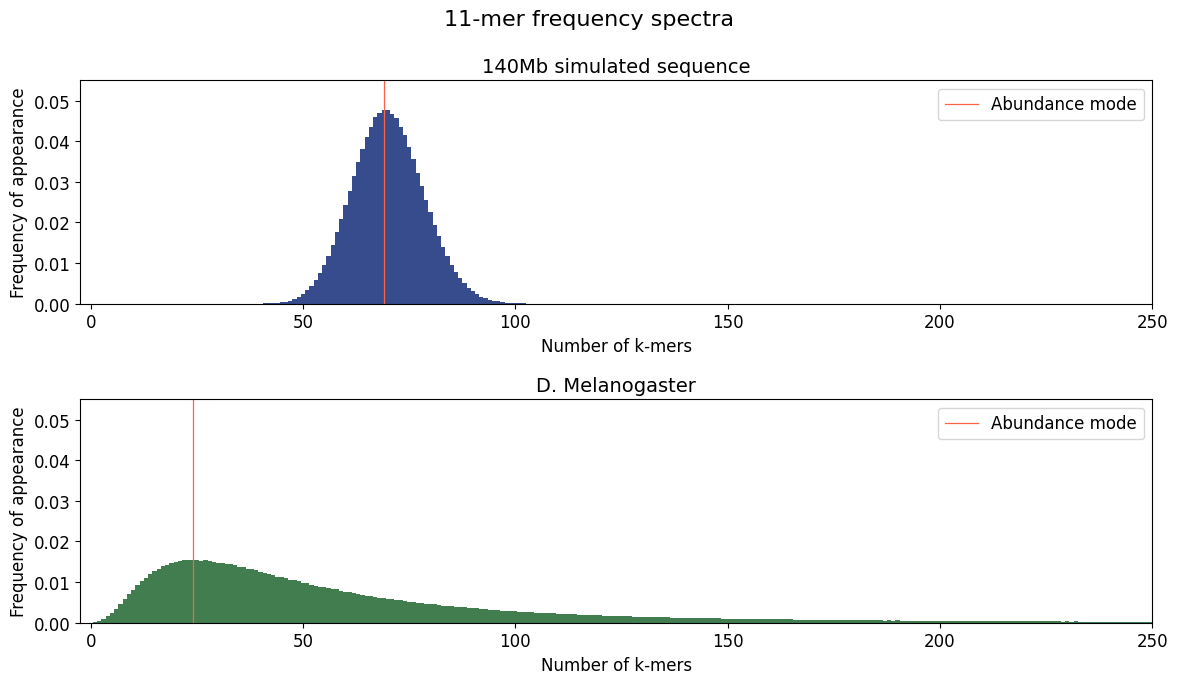

In [403]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("11-mer frequency spectra")
fig.set_figheight(7)
fig.set_figwidth(12)
plot_abundance(ax1, sim, 250, "140Mb simulated sequence", c_darkblue)
plot_abundance(ax2, fly, 250, "D. Melanogaster", c_darkgreen)
fig.tight_layout()
fig.savefig('11mer_frequency_spectra.png', dpi = 250)